# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
housing_df= pd.read_csv('/Users/kellyjara/Desktop/Phase2_Project/Data/kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# Finding and Removing Null Values

In [4]:
housing_df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [5]:
housing_df.dropna(inplace = True)

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [7]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [8]:
housing_df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

# Creating a new column with zipcodes

In [9]:
housing_df['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
A, Leadwood, Missouri 63653, United States                                      17
                                                                                ..
1025 East Hemlock Street, Kent, Washington 98030, United States                  1
25013 Summit Drive, Black Diamond, Washington 98010, United States               1
11113 Southeast 323rd Street, Auburn, Washington 98092, United States            1
19166 Northeast 43rd Court, Sammamish, Washington 98074, United States           1
18615 7th Avenue South, Burien, Washington 98148, United States                  1
Name: address, Length: 29519, dtype: int64

In [10]:
housing_df['zipcode'] = housing_df['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')
housing_df['zipcode'] = housing_df['zipcode'].astype(int)

In [11]:
housing_df = housing_df.drop(columns =['id', 'yr_renovated'], axis = 1 )

In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30111 non-null  object 
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 18  sqft_p

# Creating a new column based on condition values

In [13]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [14]:
housing_df["condition"] = housing_df["condition"].astype('category')
housing_df["condition"] = housing_df["condition"].cat.reorder_categories(
    ["Poor","Fair","Average","Good","Very Good"])

In [15]:
housing_df["condition_code"] = housing_df["condition"].cat.codes
housing_df["condition_code"].value_counts()

2    18515
3     8052
4     3258
1      225
0       61
Name: condition_code, dtype: int64

# Splitting string and numerical value form the grades column. Creating a new column with grades numerical value

In [16]:
housing_df["grade"].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [17]:
import string
housing_df["grade_str"] = housing_df["grade"].str.strip(string.digits)
housing_df["grade_str"] = housing_df["grade_str"].str.strip()

In [18]:
housing_df["grade_code"] = housing_df["grade_str"].astype('category')
categories = ['Substandard','Poor','Low','Fair','Low Average','Average','Good','Better',
             'Very Good','Excellent','Luxury','Mansion']
housing_df["grade_code"] = housing_df["grade_code"].cat.reorder_categories(categories)
housing_df["grade_code"] = housing_df["grade_code"].cat.codes
housing_df["grade_code"].value_counts()

5     11693
6      9400
7      3804
4      2852
8      1369
9       406
3       385
10      122
2        46
11       24
1         9
0         1
Name: grade_code, dtype: int64

# Repeating steps above w/ view column

In [19]:
housing_df["view_code"] = housing_df["view"].astype('category')
categories2 = ["NONE","FAIR","AVERAGE","GOOD","EXCELLENT"]
housing_df["view_code"] = housing_df["view_code"].cat.reorder_categories(categories2)
housing_df["view_code"] = housing_df["view_code"].cat.codes
housing_df["view_code"].value_counts()

0    26555
2     1910
3      877
4      549
1      220
Name: view_code, dtype: int64

## Removing zip codes not in Kings County

In [20]:
zip_dict = dict({
98002 : "Auburn",
98092: "Auburn",
98224: "Baring",
98004: "Bellevue",
98005: "Bellevue",
98006: "Bellevue",
98007: "Bellevue",
98008: "Bellevue",
98010: "Black Diamond",
98011: "Bothell",
98178: "Bryn Mawr-Skyway",
98148: "Burien",
98166: "Burien",
98014: "Carnation",
98077: "Cottage Lake",
98042: "Covington",
98198: "Des Moines",
98019: "Duvall",
98031: "East Hill-Meridian",
98022: "Enumclaw",
98058: "Fairwood",
98024: "Fall City",
98003: "Federal Way",
98023: "Federal Way",
98027: "Issaquah",
98029: "Issaquah",
98028: "Kenmore",
98032: "Kent",
98030: "Kent",
98033: "Kirkland",
98034: "Kirkland",
98001: "Lakeland North",
98038: "Maple Valley",
98039: "Medina",
98040: "Mercer Island",
98045: "North Bend",
98047: "Pacific",
98050: "Preston",
98051: "Ravensdale",
98052: "Redmond",
98055: "Renton",
98056: "Renton",
98057: "Renton",
98059: "Renton",
98074: "Sammamish",
98075: "Sammamish",
98188: "SeaTac",
98199: "Seattle",
98174: "Seattle",
98154: "Seattle",
98158: "Seattle",
98164: "Seattle",
98101: "Seattle",
98102: "Seattle",
98103: "Seattle",
98104: "Seattle",
98105: "Seattle",
98106: "Seattle",
98107: "Seattle",
98108: "Seattle",
98109: "Seattle",
98112: "Seattle",
98115: "Seattle",
98116: "Seattle",
98117: "Seattle",
98118: "Seattle",
98119: "Seattle",
98121: "Seattle",
98122: "Seattle",
98125: "Seattle",
98126: "Seattle",
98133: "Seattle",
98134: "Seattle",
98136: "Seattle",
98144: "Seattle",
98155: "Shoreline",
98177: "Shoreline",
98288: "Skykomish",
98065: "Snoqualmie",
98168: "Tukwila",
98053: "Union Hill-Novelty Hill",
98195: "Univ Of Washington",
98070: "Vashon",
98146: "White Center",
98072: "Woodinville"})

In [21]:
zip_list = list(zip_dict.keys())

In [22]:
housing_df2 = housing_df[housing_df["zipcode"].isin(zip_list)]
housing_df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_patio,yr_built,address,lat,long,zipcode,condition_code,grade_str,grade_code,view_code
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,3,Average,5,0
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2,Average,5,2
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2,Average,5,2
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2,Better,7,2
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2,Average,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,3,Good,6,0
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,2,Average,5,1
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,2,Average,5,0
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,2,Good,6,0


In [23]:
housing_df2 = housing_df2.drop(columns = ["condition","grade","grade_str","view", "sqft_basement"], axis=1)

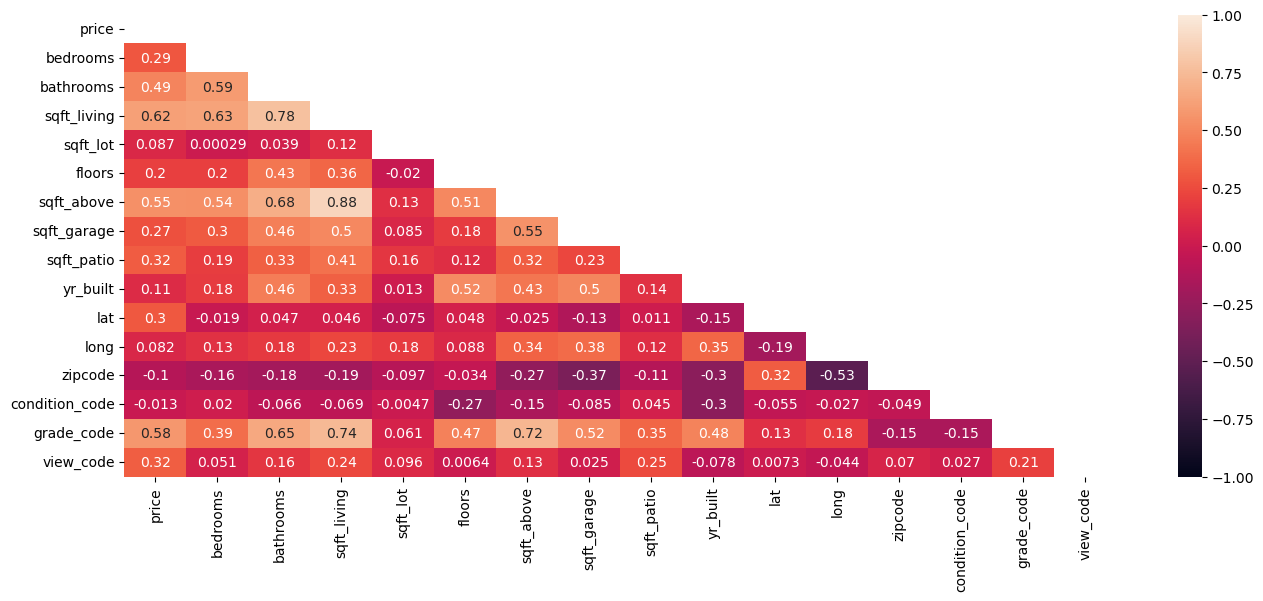

In [24]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(housing_df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

In [25]:
housing_df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_garage,sqft_patio,yr_built,lat,long,zipcode,condition_code,grade_code,view_code
count,2.914900e+04,29149.000000,29149.000000,29149.000000,2.914900e+04,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.00000
mean,1.113429e+06,3.436928,2.332807,2131.761536,1.712923e+04,1.516639,1826.453292,336.493533,216.385468,1973.829394,47.543327,-122.214455,98077.230265,2.487324,5.639302,0.30152
std,8.958603e+05,0.976836,0.894821,976.885624,6.085121e+04,0.548334,880.328665,286.238563,246.801963,31.667405,0.145961,0.142918,54.107337,0.707848,1.152643,0.86269
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,1900.000000,47.159700,-122.526650,98001.000000,0.000000,0.000000,0.00000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,40.000000,1952.000000,47.431010,-122.328460,98032.000000,2.000000,5.000000,0.00000
50%,8.690000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,400.000000,141.000000,1976.000000,47.557890,-122.234070,98059.000000,2.000000,5.000000,0.00000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.077200e+04,2.000000,2290.000000,520.000000,310.000000,2001.000000,47.672005,-122.127645,98117.000000,3.000000,6.000000,0.00000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,3580.000000,4370.000000,2022.000000,47.789830,-121.163960,98288.000000,4.000000,11.000000,4.00000


In [26]:
housing_df2['price'] = housing_df2['price'].astype(int)

In [27]:
housing_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 30154
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            29149 non-null  object 
 1   price           29149 non-null  int64  
 2   bedrooms        29149 non-null  int64  
 3   bathrooms       29149 non-null  float64
 4   sqft_living     29149 non-null  int64  
 5   sqft_lot        29149 non-null  int64  
 6   floors          29149 non-null  float64
 7   waterfront      29149 non-null  object 
 8   greenbelt       29149 non-null  object 
 9   nuisance        29149 non-null  object 
 10  heat_source     29149 non-null  object 
 11  sewer_system    29149 non-null  object 
 12  sqft_above      29149 non-null  int64  
 13  sqft_garage     29149 non-null  int64  
 14  sqft_patio      29149 non-null  int64  
 15  yr_built        29149 non-null  int64  
 16  address         29149 non-null  object 
 17  lat             29149 non-null 

# Simple Linear Regression (Price - Grade)

In [28]:
import statsmodels.api as sm

X = housing_df2[['grade_code']]
y = housing_df2['price']

# Replace None with appropriate code
simple_grade_model = sm.OLS(endog = y, exog = sm.add_constant(X))

grade_model_results = simple_grade_model.fit()
print(grade_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                 1.462e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:            -4.3494e+05
No. Observations:               29149   AIC:                         8.699e+05
Df Residuals:                   29147   BIC:                         8.699e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.42e+06   2.14e+04    -66.391      0.0

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [30]:
grade_lr = LinearRegression()
grade_lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = grade_lr.predict(X_test)

grade_mean = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error = $', grade_mean)
grade_r2 = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error = $', grade_r2)

Mean Absolute Error = $ 410183.8714053475
Root Mean Square Error = $ 745311.6444244412


In [32]:
r_squared = grade_lr.score(X_train, y_train)
r_squared

0.33587863674308627

In [33]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train.shape[1]-1))
adj_r2

0.3358558515040134

In [34]:
grade_lr.score(X_test, y_test)

0.3268398353424711

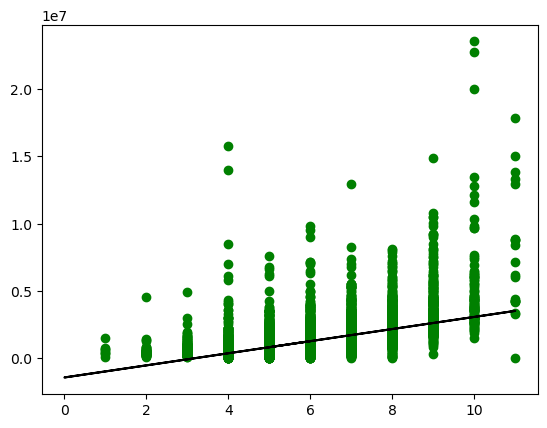

In [35]:
plt.scatter(X_train, y_train, color = 'g')
plt.plot(X_test, y_pred, color = 'k')

plt.show()

In [36]:
# scaling grade / price

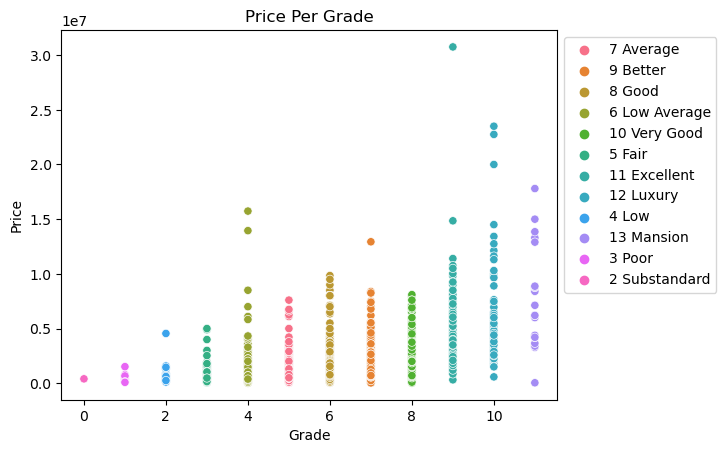

In [37]:
fig, ax = plt.subplots()

sns.scatterplot(x = "grade_code", y = "price",hue = "grade", data = housing_df)
ax.set_title("Price Per Grade")
ax.set_ylabel("Price")
ax.set_xlabel("Grade")

plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

# Price - Condition

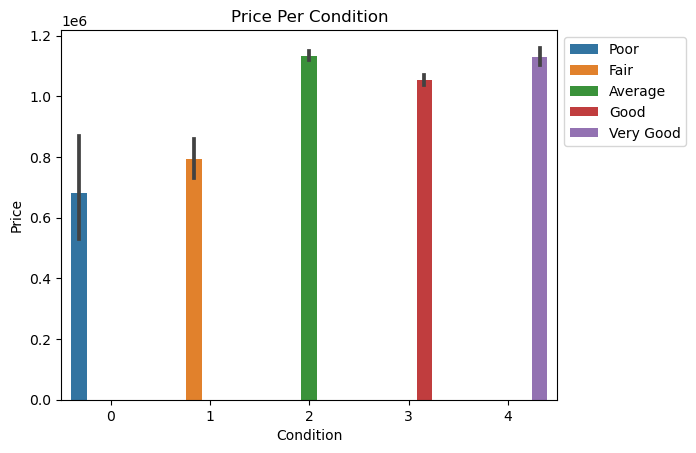

In [38]:
fig, ax = plt.subplots()

sns.barplot(x = "condition_code", y = "price",hue = "condition", data = housing_df)
ax.set_title("Price Per Condition")
ax.set_ylabel("Price")
ax.set_xlabel("Condition")

plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

In [39]:
X_cond = housing_df2[['condition_code']]
y_cond = housing_df2['price']

# Replace None with appropriate code
condition_model = sm.OLS(endog = y_cond, exog = sm.add_constant(X_cond))

condition_model_results = condition_model.fit()
print(condition_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.794
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0286
Time:                        13:27:33   Log-Likelihood:            -4.4086e+05
No. Observations:               29149   AIC:                         8.817e+05
Df Residuals:                   29147   BIC:                         8.817e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.154e+06   1.92e+04     60.

In [40]:
X_cond_train, X_cond_test, y_cond_train, y_cond_test = train_test_split(X_cond, y_cond, test_size = 0.20, random_state = 42)

In [41]:
cond_lr = LinearRegression()
cond_lr.fit(X_cond_train, y_cond_train)

LinearRegression()

In [42]:
y_cond_pred = cond_lr.predict(X_cond_test)

cond_mean = mean_absolute_error(y_cond_test,y_cond_pred)
print('Mean Absolute Error = $', cond_mean)
cond_r2 = mean_squared_error(y_cond_test, y_cond_pred, squared = False)
print('Root Mean Square Error = $', grade_r2)

Mean Absolute Error = $ 529579.8292724964
Root Mean Square Error = $ 745311.6444244412


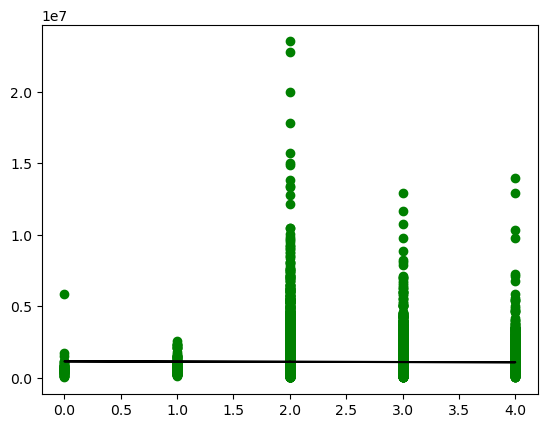

In [43]:
plt.scatter(X_cond_train, y_cond_train, color = 'g')
plt.plot(X_cond_test, y_cond_pred, color = 'k')

plt.show()

# Creating more categoricals: Waterfront, Greenbelt etc...

In [44]:
housing_df2['waterfront'].value_counts()

NO     28641
YES      508
Name: waterfront, dtype: int64

In [45]:
housing_df2["waterfront"] = housing_df2["waterfront"].astype('category')
categories2 = ["NO","YES"]
housing_df2["waterfront"] = housing_df2["waterfront"].cat.reorder_categories(categories2)
housing_df2["waterfront"] = housing_df2["waterfront"].cat.codes
housing_df2["waterfront"].value_counts()

0    28641
1      508
Name: waterfront, dtype: int64

In [46]:
housing_df2['greenbelt'].value_counts()

NO     28380
YES      769
Name: greenbelt, dtype: int64

In [47]:
housing_df2["greenbelt"] = housing_df2["greenbelt"].astype('category')
categories2 = ["NO","YES"]
housing_df2["greenbelt"] = housing_df2["greenbelt"].cat.reorder_categories(categories2)
housing_df2["greenbelt"] = housing_df2["greenbelt"].cat.codes
housing_df2["greenbelt"].value_counts()

0    28380
1      769
Name: greenbelt, dtype: int64

In [48]:
housing_df2['nuisance'].value_counts()

NO     24146
YES     5003
Name: nuisance, dtype: int64

In [49]:
housing_df2["nuisance"] = housing_df2["nuisance"].astype('category')
categories2 = ["NO","YES"]
housing_df2["nuisance"] = housing_df2["nuisance"].cat.reorder_categories(categories2)
housing_df2["nuisance"] = housing_df2["nuisance"].cat.codes
housing_df2["nuisance"].value_counts()

0    24146
1     5003
Name: nuisance, dtype: int64

In [50]:
housing_df2['heat_source'].value_counts()

Gas                  20137
Electricity           5940
Oil                   2898
Gas/Solar               93
Electricity/Solar       57
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [51]:
housing_df2["heat_source"] = housing_df2["heat_source"].astype('category')
categories2 = ["Gas","Electricity","Oil","Gas/Solar","Electricity/Solar","Other","Oil/Solar"]
housing_df2["heat_source"] = housing_df2["heat_source"].cat.reorder_categories(categories2)
housing_df2["heat_source"] = housing_df2["heat_source"].cat.codes
housing_df2["heat_source"].value_counts()

0    20137
1     5940
2     2898
3       93
4       57
5       20
6        4
Name: heat_source, dtype: int64

In [52]:
housing_df2['sewer_system'].value_counts()

PUBLIC                24817
PRIVATE                4325
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [53]:
housing_df2.drop(housing_df2[housing_df2['sewer_system'] == 'PUBLIC RESTRICTED'].index, inplace = True)
housing_df2.drop(housing_df2[housing_df2['sewer_system'] == 'PRIVATE RESTRICTED'].index, inplace = True)

In [54]:
housing_df2['sewer_system'].value_counts()

PUBLIC     24817
PRIVATE     4325
Name: sewer_system, dtype: int64

In [55]:
housing_df2["sewer_system"] = housing_df2["sewer_system"].astype('category')
categories2 = ["PUBLIC","PRIVATE"]
housing_df2["sewer_system"] = housing_df2["sewer_system"].cat.reorder_categories(categories2)
housing_df2["sewer_system"] = housing_df2["sewer_system"].cat.codes
housing_df2["sewer_system"].value_counts()

# if this value is this then with public and private; make it a binary code

0    24817
1     4325
Name: sewer_system, dtype: int64

# Multiple Linear Regression - Model 2 

In [56]:
housing_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29142 entries, 0 to 30154
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            29142 non-null  object 
 1   price           29142 non-null  int64  
 2   bedrooms        29142 non-null  int64  
 3   bathrooms       29142 non-null  float64
 4   sqft_living     29142 non-null  int64  
 5   sqft_lot        29142 non-null  int64  
 6   floors          29142 non-null  float64
 7   waterfront      29142 non-null  int8   
 8   greenbelt       29142 non-null  int8   
 9   nuisance        29142 non-null  int8   
 10  heat_source     29142 non-null  int8   
 11  sewer_system    29142 non-null  int8   
 12  sqft_above      29142 non-null  int64  
 13  sqft_garage     29142 non-null  int64  
 14  sqft_patio      29142 non-null  int64  
 15  yr_built        29142 non-null  int64  
 16  address         29142 non-null  object 
 17  lat             29142 non-null 

In [57]:
df = housing_df2.drop(columns=['zipcode'])

In [58]:
# Train - Test Split

In [59]:
y = np.log(df['price'])

X = df.drop(columns=['price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [62]:
base  = ['bedrooms', 'bathrooms', 'sqft_living','sqft_above','sqft_lot','floors',"grade_code", "view_code",
         "condition_code", 'sqft_garage', 'sqft_patio', "yr_built",
         "waterfront", "greenbelt", "nuisance", "heat_source","sewer_system"]

lr = LinearRegression()

results = lr.fit(X_train[base], y_train)

In [63]:
r_squared = lr.score(X_train[base], y_train)
r_squared

0.5017101030542943

In [64]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train.shape[1]-1))
adj_r2

0.5013507593786124

In [65]:
lr.score(X_test[base], y_test)

0.5027663340674988

In [69]:
y_pred = lr.predict(X_test[base])

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 0.2919285316611988 USD
Root Mean Square Error = 0.41292901950905764 USD


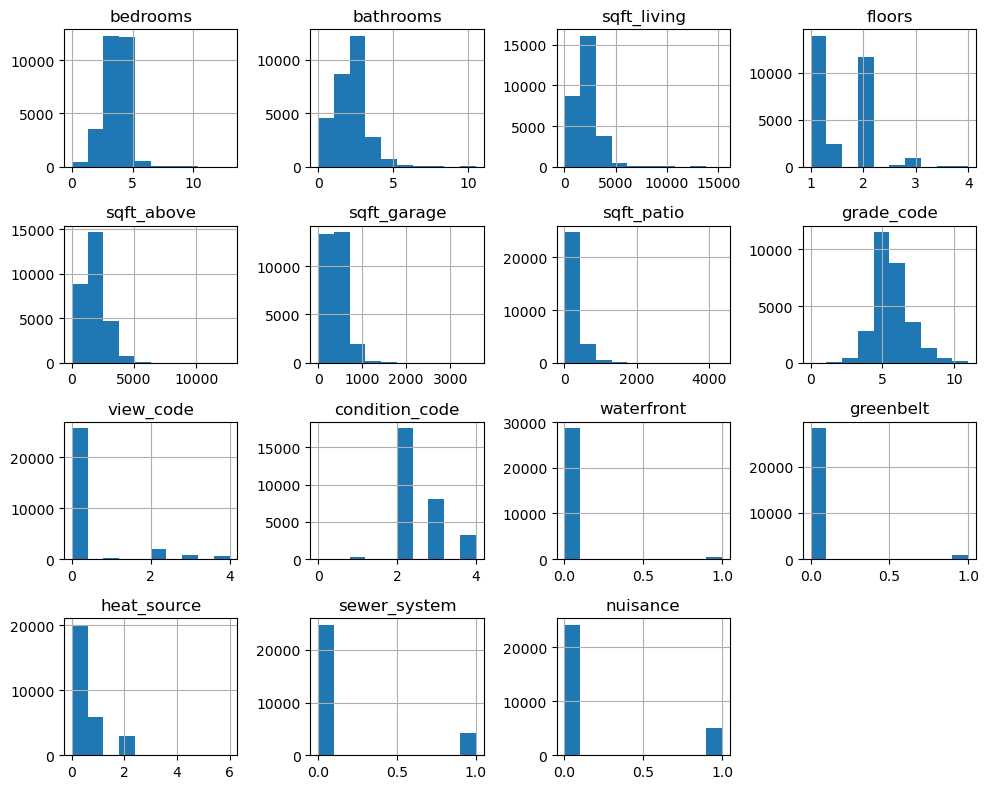

In [70]:
df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above','sqft_garage',
    'sqft_patio',"grade_code","view_code","condition_code", "waterfront", "greenbelt","heat_source","sewer_system","nuisance"]].hist(figsize=(10,8))
plt.tight_layout();